In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

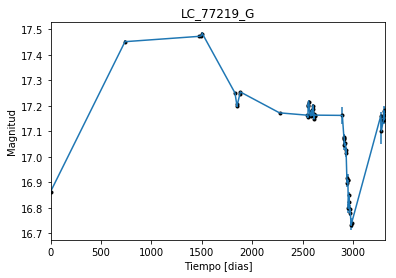

In [2]:
data = np.genfromtxt('LC_77219_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_77219_G')
plt.savefig("LC_77219_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

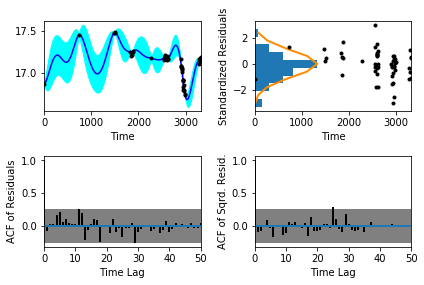

In [5]:
sample.assess_fit()

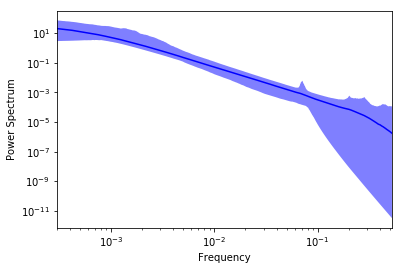

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

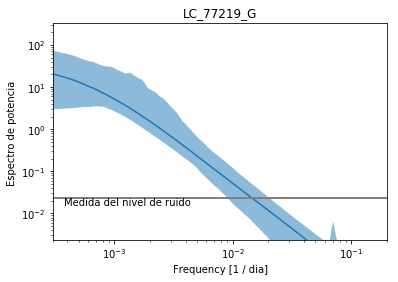

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_77219_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_77219_G')

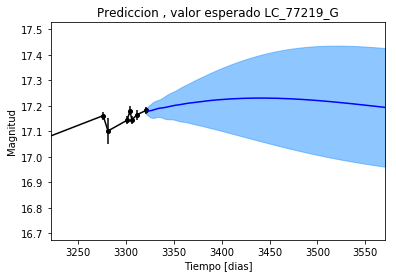

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_77219_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_77219_G')

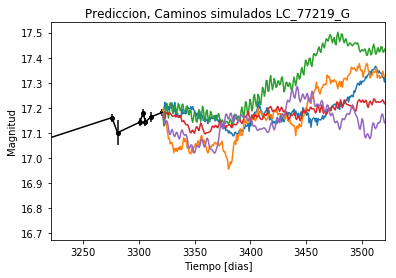

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_77219_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


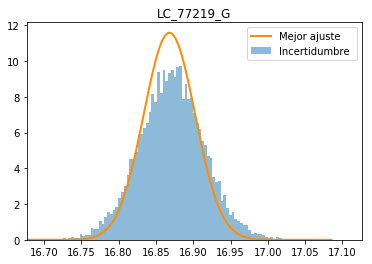

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_77219_G')
plt.savefig("Mejor_ajuste_LC_77219_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_77219_G')

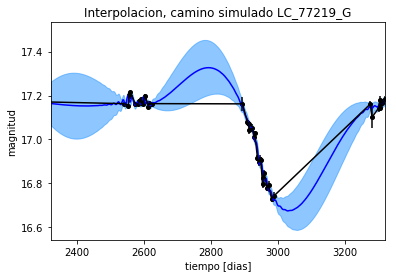

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_G')

Text(0.5,1,'Interpolacion, camino simulado LC_77219_G')

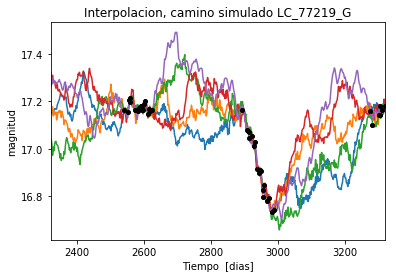

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_G')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 431.243733361
Median: 0.0534349433311
Standard deviation: 0.209837076209
68% credibility interval: [ 0.00592359  0.29342591]
95% credibility interval: [ 0.00098849  0.83616471]
99% credibility interval: [  5.12743270e-04   9.70769040e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 549.235418955
Median: 0.0400826887699
Standard deviation: 0.154554195501
68% credibility interval: [ 0.00311633  0.21320871]
95% credibility interval: [  3.95754821e-04   5.86381264e-01]
99% credibility interval: [  3.12547621e-04   7.86210036e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 239.812804734
Median: 0.0948989698052
Standard de

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 232.297258569
Median: 122.496410302
Standard deviation: 2.31085225488
68% credibility interval: [ 120.14959282  124.14522802]
95% credibility interval: [ 117.32363813  126.82187718]
99% credibility interval: [ 115.06858497  129.10174846]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 286.113765794
Median: 1.5611320561
Standard deviation: 3.26035688646
68% credibility interval: [ 0.27397882  6.43336062]
95% credibility interval: [  0.06386844  11.50353511]
99% credibility interval: [  0.03257387  13.81030421]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 606.646025215
Median: 9.94806325793
Standard deviation: 15.9594537329
68% credibility interval: [  1.98919809  32.4910836 ]
95% credibility interval: [  0.19687152

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 661.65463132
Median: 1.82579769975e-27
Standard deviation: 2.33887293615e+27
68% credibility interval: [  2.78326729e-72   1.39833852e+01]
95% credibility interval: [  1.62459705e-113   7.41036142e+001]
99% credibility interval: [  2.16099905e-116   1.00079461e+021]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 692.018437885
Median: 17.1782183722
Standard deviation: 0.105699368951
68% credibility interval: [ 17.08683575  17.27496697]
95% credibility interval: [ 16.97187393  17.38562357]
99% credibility interval: [ 16.83286503  17.47694959]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 330.433529331
Median: 0.339509348302
Standard deviation: 0.294360714163
68% credibility interval: [ 0.07828288  0.77642812]
95% credibility interval: [ 0.         0.9913564]
99% credibility interval: [ 0.          1.02879801]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 330.433529331
Median: 0.339509348302
Standard deviation: 0.294360714163
68% credibility interval: [ 0.07828288  0.77642812]
95% credibility interval: [ 0.         0.9913564]
99% credibility interval: [ 0.          1.02879801]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 263.24707234
Median: 0.0
Standard deviation: 0.000574998581421
68% credibili

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 232.297258569
Median: 122.496410302
Standard deviation: 2.31085225488
68% credibility interval: [ 120.14959282  124.14522802]
95% credibility interval: [ 117.32363813  126.82187718]
99% credibility interval: [ 115.06858497  129.10174846]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 440.509729046
Median: 0.0443300012371
Standard deviation: 0.0391078212367
68% credibility interval: [ 0.03067219  0.06933869]
95% credibility interval: [ 0.02196655  0.14371407]
99% credibility interval: [ 0.0179266   0.28830761]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1787.97759806
Median: 1.08131800229
Standard deviation: 0.243986545692
68% credibility interval: [ 0.88124943  1.34715499]
95% credibility interval: [ 0.73300199  1.69478726]
99% credibility interval: [ 0.65334638  1.88836887]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 267.161629316
Median: 0.0419536875344
Standard deviation: 0.503134903969
68% credibility interval: [ 0.00213305  0.51781204]
95% credibility interval: [  1.56054897e-04   1.82025232e+00]
99% credibility interval: [  2.80543415e-23   2.84350411e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 431.243733361
Median: (-0.335741650828-1.22544325389j)
Standard deviation: 2.27135044538
68% credibility interval: [-1.84364937-3.23384744j -0.03721902-1.76530517j]
95% credibility interval: [-5.25377784+0.j         -0.00621088-4.75772777j]
99% credibility interval: [ -6.09952177e+00+0.j          -3.22166098e-03-0.45595073j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 549.235418955
Median: (-0.251846961151+4.7413991652j)
Standard deviation: 2.08896049408
68% credibility interval: [-1.33962982+0.86891536j -0.01958045+1.3560982j ]
95% credibility interval: [ -3.68434214e+00+3.65631496j  -2.48660087e-03+0.j        ]
99% credibility interval: [ -4.93990335e+00+2.90321028j  -1.96379462e-03+0.j        ]
Posterior summary